In [1]:
# Description: We want to first establish a good dataset for training the model. We will attempt to utilize set features for now and implement RFE (Recursive Feature Elimination) to get a set
# of good features later on.    

### **Features to Include**
# Sodium: 309
# Potassium: 308
# Glucose: 300
# Creatinine: 314
# Chloride: 307
# Calcium: 318
# Urea Nitrogen: 315
# Bicarbonate (EC02): 310
# ALB: 303
# TP (Total Protein): 301
# ALKP: 321
# AST: 320
# TBIL: 319
# Creatinine: 324
# ALT: 357

# 324, 320, 357

# 309, 308, 300, 314, 307, 318, 315, 310, 303, 301, 321, 320, 319 

### **Data Input & Cleaning**


In [2]:
# format the excel file to dataframe
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [3]:
# import dataframe filepath with n = 10,000,000 data points
file_path = "C:/Users/rgae/Downloads/76e9275b-0c8b-458c-93dd-8119300c0add.csv"#"C:/Users/rgae/Downloads/247c3118-11e7-436c-ac1c-0e1060786b45.csv"#
df = pd.read_csv(file_path)
df = df.dropna()

# Observe dataFrame
df

,model,j_no,zip_file_id,lresultid,ebodyfluid,lassaynumber,srepindexintest,fconcentration,fsihemolysisvalue,fsiturbidityvalue,fsiicterusvalue
30,V4303,76000017,29621367,382.0,6.0,321,0,118.093000,15.0,20.0,2.0000
123,V4303,76000017,30237615,400.0,6.0,308,0,10.012300,15.0,20.0,2.0000
125,V4303,76000017,30237615,403.0,6.0,308,0,9.933890,15.0,20.0,2.0000
239,V4303,76000022,28452989,2261.0,5.0,344,0,6.130040,15.0,20.0,2.0000
240,V4303,76000022,28452989,2261.0,5.0,344,1,5.217440,15.0,20.0,2.0000
...,...,...,...,...,...,...,...,...,...,...,...
9999995,V4303,76000160,27834238,180902.0,5.0,309,0,140.316000,15.0,20.0,2.0626
9999996,V4303,76000160,27834238,180902.0,5.0,314,0,0.558495,15.0,20.0,2.0626
9999997,V4303,76000160,27834238,180902.0,5.0,315,0,15.200900,15.0,20.0,2.0626
9999998,V4303,76000160,27834238,180902.0,5.0,320,0,29.522000,15.0,20.0,2.0626


In [4]:
# Pivot the data with lassayNumbers in the column header
df['fconcentration'] = df['fconcentration'].astype('float32')
df['fsihemolysisvalue'] = df['fsihemolysisvalue'].astype('float32')
df['fsiturbidityvalue'] = df['fsiturbidityvalue'].astype('float32')
df['fsiicterusvalue'] = df['fsiicterusvalue'].astype('float32')

# Accessing the multi-level column using tuples
df_pivot = df.pivot_table(index=['j_no', 'lresultid'], columns='lassaynumber', values = 'fconcentration').reset_index()

# Drop rows where all 'fconcentration' columns are NaN df[['fsihemolysisvalue', 'fsiturbidityvalue', 'fsiicterusvalue']]
df_pivot

lassaynumber,j_no,lresultid,1,3,4,5,6,7,8,10,...,987,988,989,990,991,992,993,994,995,996
0,76000017,382.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76000017,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,76000017,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,76000022,2261.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,76000022,2263.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1506447,76000160,180897.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506448,76000160,180898.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506449,76000160,180899.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1506450,76000160,180900.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
mask1 = df['j_no'] == 76000022
mask2 = df['lresultid'] == 2263
mask = mask1 & mask2
df[mask]

,model,j_no,zip_file_id,lresultid,ebodyfluid,lassaynumber,srepindexintest,fconcentration,fsihemolysisvalue,fsiturbidityvalue,fsiicterusvalue
248,V4303,76000022,28452989,2263.0,5.0,31,0,11.165600,15.0,20.0,2.0
249,V4303,76000022,28452989,2263.0,5.0,32,0,14.384900,15.0,20.0,2.0
251,V4303,76000022,28452989,2263.0,5.0,117,0,20.000000,15.0,20.0,2.0
252,V4303,76000022,28452989,2263.0,5.0,121,0,0.629136,15.0,20.0,2.0


In [7]:
mask1 = df_pivot['j_no'] == 76000022
mask2 = df_pivot['lresultid'] == 2263
mask = mask1 & mask2
b = df_pivot[mask]

In [8]:
# ALT, AST, UREA, CREATINE KINASE, and Lactate NaN [357, 320, 315, 324, 312]
df_pivot = df_pivot[df_pivot[324].notna()]

###### join the hemolysis, siturbidityvalue, siicterusvalue at the end	
#df_pivot = pd.merge(df_pivot, df[['fsihemolysisvalue', 'fsiturbidityvalue', 'fsiicterusvalue', 'lresultid']], on = 'lresultid', how = 'inner')

# Merge the dataframes
df_pivot = pd.merge(df_pivot, df[['fsihemolysisvalue', 'fsiturbidityvalue', 'fsiicterusvalue', 'lresultid']], on='lresultid', how='inner')

# Drop duplicates
df_pivot = df_pivot.drop_duplicates(subset=['lresultid'])

perc = 50
min_count =  int(((100-perc)/100)*df_pivot.shape[0] + 1)
df_pivot = df_pivot.dropna(axis=1, thresh=min_count)

In [9]:
# 309, 308, 300, 314, 307, 318, 315, 310, 303, 301, 321, 320, 319 
# df_pivot = df_pivot[[324, 320, 357,'fsihemolysisvalue', 'fsiturbidityvalue', 'fsiicterusvalue']]
df_pivot = df_pivot[[324, 320, 357]]

In [10]:
df_pivot

,324,320,357
0,51.845600,NaN,NaN
7,92.797501,NaN,NaN
13,20.000000,NaN,NaN
14,115.905998,34.245899,36.605598
25,81.912498,25.236000,28.072800
...,...,...,...
1529695,47.965599,53.441299,16.946600
1529743,18.000000,10.631000,8.546240
1529817,36.710499,15.618000,12.273400
1529850,98.682899,14.101500,14.850200


In [11]:
df_pivot = df_pivot.dropna(how='any')

In [12]:
df_pivot

,324,320,357
14,115.905998,34.245899,36.605598
25,81.912498,25.236000,28.072800
37,29.316999,32.040798,18.480499
61,247.455002,130.264999,123.695999
87,48.524101,30.776199,44.937000
...,...,...,...
1529695,47.965599,53.441299,16.946600
1529743,18.000000,10.631000,8.546240
1529817,36.710499,15.618000,12.273400
1529850,98.682899,14.101500,14.850200


In [13]:
# Give normal ranges for the assays to limit outliers

# Range for CK
df_pivot = df_pivot[(df_pivot[324]>=0) & (df_pivot[324]<=1600)] # 1600
# Range for AST
df_pivot = df_pivot[(df_pivot[320]>=0) & (df_pivot[320]<=1000)]
# Range for ALTV
df_pivot = df_pivot[(df_pivot[357]>=0) & (df_pivot[357]<=750)]
# Range for Sodium
#df_pivot = df_pivot[(df_pivot[309]>=75) & (df_pivot[309]<=250)]

In [14]:
df_pivot

,324,320,357
14,115.905998,34.245899,36.605598
25,81.912498,25.236000,28.072800
37,29.316999,32.040798,18.480499
61,247.455002,130.264999,123.695999
87,48.524101,30.776199,44.937000
...,...,...,...
1529695,47.965599,53.441299,16.946600
1529743,18.000000,10.631000,8.546240
1529817,36.710499,15.618000,12.273400
1529850,98.682899,14.101500,14.850200


In [18]:
# Create the classification target variables here
# low = 0; med = 1; high = 2
df_pivot['CK_class'] = pd.cut(df_pivot[324], bins = [0, 30, 150, 1600], labels=[0, 1, 2])

In [16]:
# Split data into features and target
X = df_pivot.loc[:, ~df_pivot.columns.isin([324])]
y = df_pivot[324]
X = X.rename(str,axis="columns")

In [17]:
# Handle class imbalance using SMOTE
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

### **Random Forest Regressor**

# When utilizing distortion of test metrics, it is quite hard to predict f-concentration because there is no baseline place to start.
# Train the model 
X = df_pivot.loc[:, ~df_pivot.columns.isin([324])]
#X.columns = X.columns.astype(str)
y = df_pivot[324]
#X = X.rename(str, axis = "columns")

# Split training data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
# create the model here
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression

model = RandomForestRegressor()
model.fit(X_train, y_train)

#### **Filter Based Feature Selection***

In [ ]:
# Get feature importance for model (RF)
importance = model.feature_importances_

# Summarize and sort feature importance
feature_importance = sorted(zip(X.columns, importance), key = lambda x: x[1], reverse=True)

# Select top 16 features
top_features = [f[0] for f in feature_importance[:16]]
print("Top 16 features:", top_features)

X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

print(importance)

In [ ]:
# Training the model
model.fit(X_train_top, y_train)

In [ ]:
# Make Predictions here
y_train_prediction = model.predict(X_train_top)
y_test_prediction = model.predict(X_test_top)

In [ ]:
# Display the prediction of the train first
rf_prediction = pd.DataFrame(y_train_prediction)
rf_prediction.head(25)

In [ ]:
# Display the prediction of the test here
rf_test_prediction = pd.DataFrame(y_test_prediction)
#rf_test_prediction.head(25)

#### **Showcase Random Forest Model Performance**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# For the training set
rf_train_mse = mean_squared_error(y_train, y_train_prediction)
rf_train_r2 = r2_score(y_train, y_train_prediction)
#rf_train_rmse = root_mean_squared_error(y_train, y_train_prediction)

# For the test set
rf_test_mse = mean_squared_error(y_test, y_test_prediction)
rf_test_r2 = r2_score(y_test, y_test_prediction)
#rf_test_rmse = root_mean_squared_error(y_train, y_test_prediction)

In [ ]:
print(f'Score for Random Forest Regressor: ')
print(f"MSE for Training Dataset: {rf_train_mse}")
print(f"MSE for Testing Dataset: {rf_test_mse}")
print('\n')
print(f"R2 for Training Dataset: {rf_train_r2}")
print(f"R2 for Testing Dataset: {rf_test_r2}")

In [ ]:
df_pivot_results = pd.DataFrame(['Random Forest Regressor', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
df_pivot_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [ ]:
df_pivot_results

In [ ]:
import matplotlib.pyplot as plt
# "Residual" plot
# Interpretation: As y_train increases, the relationship flips as delta increases i.e. as y_train increases, y_train_prediction decreases demonstrated by the positive relationship.

delta = y_train - y_train_prediction
plt.scatter(x=y_train, y = delta)
plt.plot()

In [ ]:
fig = px.histogram(df_pivot[324])
fig.show()

In [ ]:
import plotly_express as px
import plotly.graph_objects as go
delta = y_train - y_train_prediction
percent_delta = (delta/y_train) * 100
fig = go.Figure()
text = 'Truth: ' + y_train.astype(str) + \
'<br>Prediction: ' + np.round(y_train_prediction, 4).astype(str) + \
"<br>% Error: " + np.round(percent_delta, 2).astype(str)
fig.add_trace(go.Scatter(
    x = y_train, 
    y = percent_delta, 
    mode = 'markers', 
    text = text
)) 
# px.scatter(x = y_train, y = percent_delta)
fig.show()

# delta_test = y_test - y_test_prediction
# percent_delta_test = (delta_test/y_test) * 100
# fig_1 = px.scatter(x=y_test, y=percent_delta_test)
# fig_1.show()

In [ ]:
# Comments on the model performance:
# Utilizing the results from the first CK paper, I was able to get up to .88 R2 result with the training data but a measely 0.12 R2 result with the test data. The following are the features I
# used in the model: ALT, AST, and Sodium to predict CK levels. I tested with each other measurement such as hemolysis and more and it convoluted the predictions. 

In [ ]:
mask = df_pivot[324] > 60000
df_pivot[mask]

Score for Random Forest Regressor:
MSE for Training Dataset: 2426.112432495567
MSE for Testing Dataset: 15581.696200618891


R2 for Training Dataset: 0.9295457851220804
R2 for Testing Dataset: 0.48094741447701184
                    Method  Training MSE  Training R2      Test MSE   Test R2
0  Random Forest Regressor   2426.112432     0.929546  15581.696201  0.480947


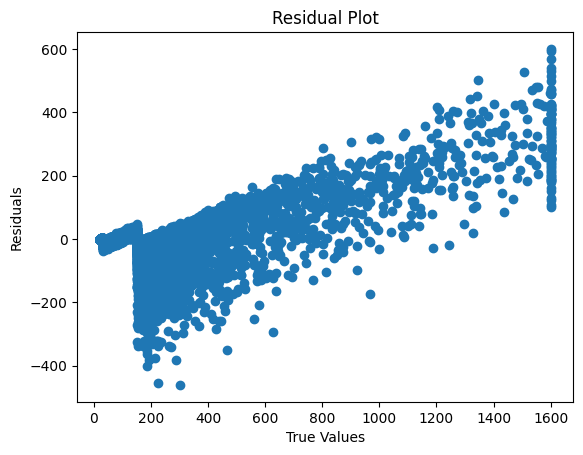

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset
file_path = "C:/Users/rgae/Downloads/76e9275b-0c8b-458c-93dd-8119300c0add.csv"
df = pd.read_csv(file_path)
df = df.dropna()

# Convert relevant columns to float32
df['fconcentration'] = df['fconcentration'].astype('float32')
df['fsihemolysisvalue'] = df['fsihemolysisvalue'].astype('float32')
df['fsiturbidityvalue'] = df['fsiturbidityvalue'].astype('float32')
df['fsiicterusvalue'] = df['fsiicterusvalue'].astype('float32')

# Pivot the data
df_pivot = df.pivot_table(index=['j_no', 'lresultid'], columns='lassaynumber', values='fconcentration').reset_index()

# Merge the dataframes
df_pivot = pd.merge(df_pivot, df[['fsihemolysisvalue', 'fsiturbidityvalue', 'fsiicterusvalue', 'lresultid']], on='lresultid', how='inner')

# Drop duplicates
df_pivot = df_pivot.drop_duplicates(subset=['lresultid'])

# Select relevant columns
df_pivot = df_pivot[[324, 320, 357, 'fsihemolysisvalue', 'fsiturbidityvalue', 'fsiicterusvalue']]

# Drop rows with any NaN values
df_pivot = df_pivot.dropna(how='any')

# Apply normal ranges to limit outliers
df_pivot = df_pivot[(df_pivot[324] >= 20) & (df_pivot[324] <= 1600)] # CK
df_pivot = df_pivot[(df_pivot[320] >= 6) & (df_pivot[320] <= 1000)]  # AST
df_pivot = df_pivot[(df_pivot[357] >= 4) & (df_pivot[357] <= 750)]   # ALT

# Create the classification target variable
# low = 0; med = 1; high = 2
df_pivot['CK_class'] = pd.cut(df_pivot[324], bins=[0, 30, 150, 1600], labels=[0, 1, 2])

# Split data into features and target
X = df_pivot.loc[:, ~df_pivot.columns.isin([324])]
y = df_pivot[324]
X= X.rename(str,axis="columns")


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_train_prediction = model.predict(X_train)
y_test_prediction = model.predict(X_test)

# Calculate performance metrics
rf_train_mse = mean_squared_error(y_train, y_train_prediction)
rf_train_r2 = r2_score(y_train, y_train_prediction)
rf_test_mse = mean_squared_error(y_test, y_test_prediction)
rf_test_r2 = r2_score(y_test, y_test_prediction)

# Print performance metrics
print(f'Score for Random Forest Regressor:')
print(f"MSE for Training Dataset: {rf_train_mse}")
print(f"MSE for Testing Dataset: {rf_test_mse}")
print('\n')
print(f"R2 for Training Dataset: {rf_train_r2}")
print(f"R2 for Testing Dataset: {rf_test_r2}")

# Create a dataframe to summarize results
df_pivot_results = pd.DataFrame([['Random Forest Regressor', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]], 
                                columns=['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2'])

# Display results
print(df_pivot_results)

# Plot residuals
delta = y_train - y_train_prediction
plt.scatter(x=y_train, y=delta)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Plot histogram
fig = px.histogram(df_pivot[324], title='CK Histogram')
fig.show()

# Plot prediction error
delta = y_train - y_train_prediction
percent_delta = (delta / y_train) * 100
fig = go.Figure()
text = 'Truth: ' + y_train.astype(str) + \
       '<br>Prediction: ' + np.round(y_train_prediction, 4).astype(str) + \
       "<br>% Error: " + np.round(percent_delta, 2).astype(str)
fig.add_trace(go.Scatter(
    x=y_train, 
    y=percent_delta, 
    mode='markers', 
    text=text
))
fig.update_layout(title='Prediction Error Plot', xaxis_title='True Values', yaxis_title='% Error')
fig.show()
